# **WAOWS6 – House Price Prediction dengan Regression**

Notebook ini berisi alur lengkap:
1. Exploratory Data Analysis (EDA)  
2. Preprocessing  
3. Training model Regression  
4. Evaluasi model  
5. Export model ke file `.pkl`  

# **SETUP & IMPORT**

## **1. Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# **LOAD DATASET**


## **2. Load Dataset California Housing**

In [2]:
dataset = fetch_california_housing(as_frame=True)
df = dataset.frame.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **3. Informasi Dasar Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## **4. Statistik Deskriptif**

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Exploratory Data Analysis (EDA)**

## **5. Cek Missing Values**

In [5]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


## **6. Distribusi Fitur Numerik**

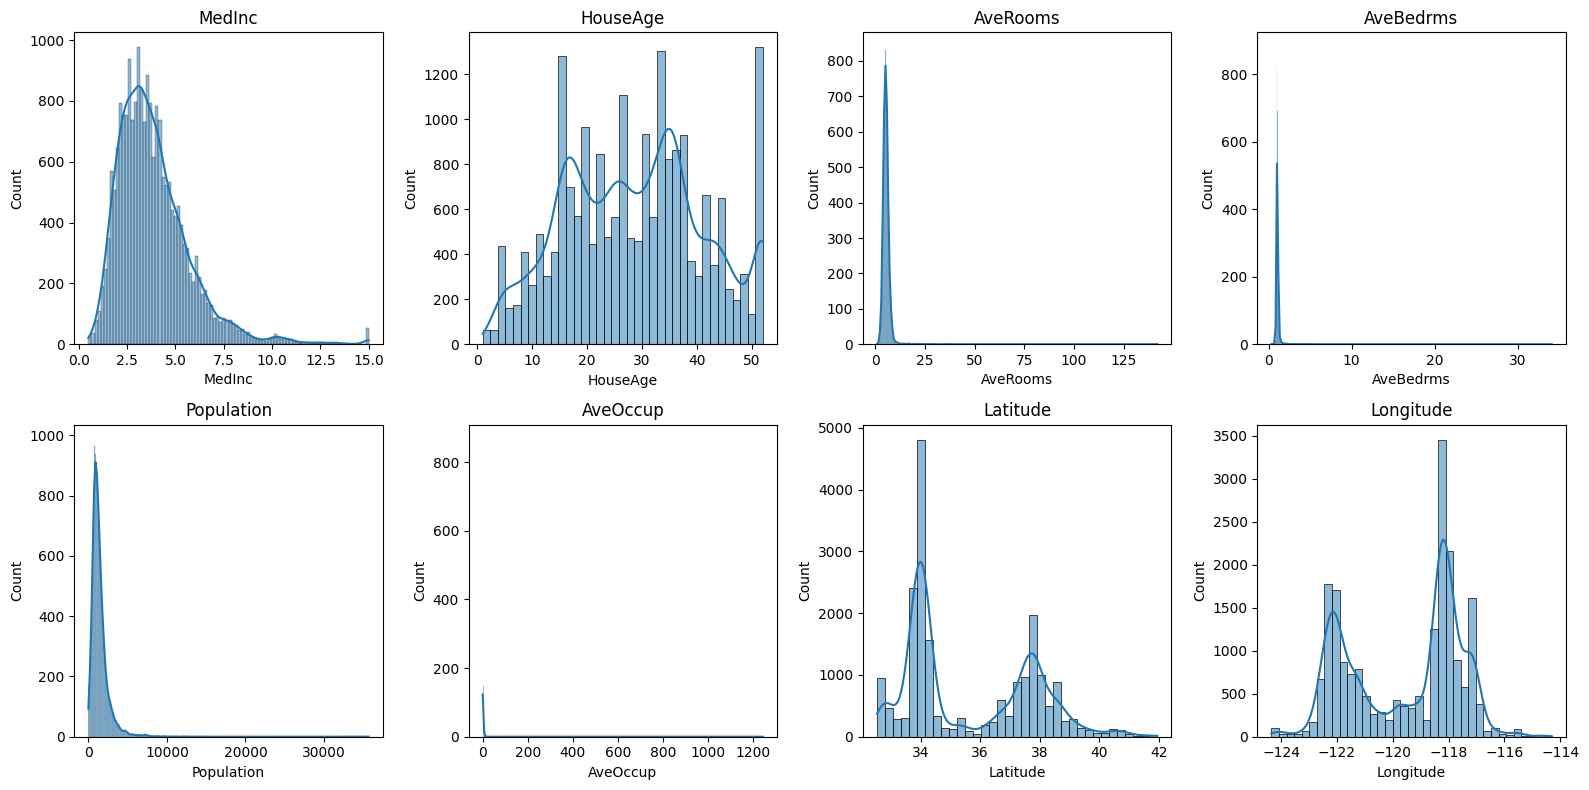

In [6]:
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                'Population', 'AveOccup', 'Latitude', 'Longitude']

plt.figure(figsize=(16, 8))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## **7. Korelasi Fitur dengan Target**

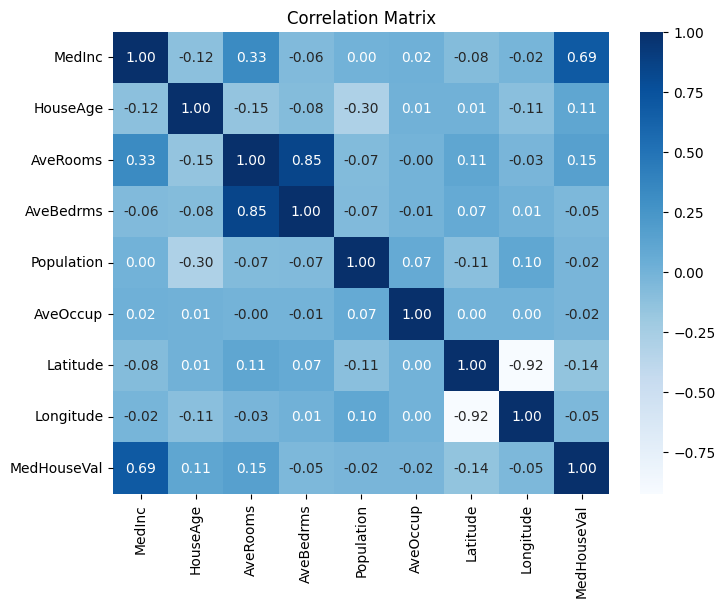

In [7]:
corr = df[feature_cols + ['MedHouseVal']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# **PREPROCESSING**

## **8. Atur Fitur dan Target**

In [8]:
X = df[feature_cols]
y = df['MedHouseVal']

## **9. Train-Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

# **MODEL TRAINING – REGRESSION**

## **10. Training Linear Regression**

In [10]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

## **11. Evaluasi Model (MAE, RMSE, R²)**

In [11]:
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.5332001304956553, np.float64(0.7455813830127764), 0.5757877060324508)

## **12. Visualisasi Actual vs Predicted**

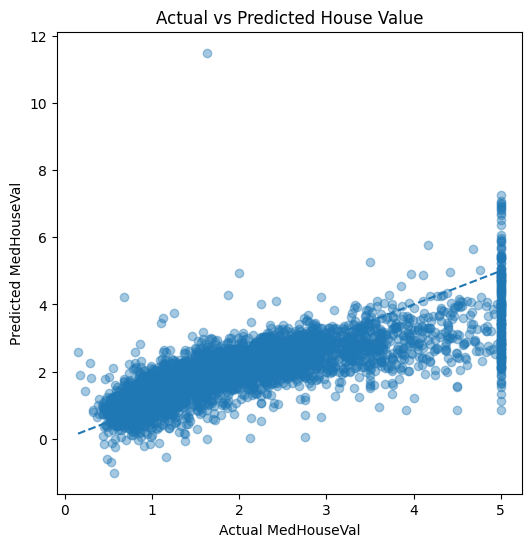

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted House Value")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()

# **PREDIKSI SATU DATA**

## **13. Contoh Prediksi dengan Input Manual**

In [14]:
sample_df = pd.DataFrame([[
    6.8,
    27,
    9.3333,
    0.97188,
    2401,
    1.4,
    34,
    -100
]], columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])

reg_model.predict(sample_df)[0]

np.float64(-5.0115722634563795)

# **EXPORT MODEL**

## **14. Export Regression Model**

In [15]:
joblib.dump(reg_model, 'regression_model.pkl')

['regression_model.pkl']